In [14]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
labels_data = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 3/labels_data.csv",header=None)
rssi_data = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 3/rssi_data.csv",header=None)

Part I: Data preparation & analysis

In [33]:
data = pd.concat([rssi_data,labels_data],axis = 1)
data.columns = ["AP1","AP2","AP3","Label"]
data

,AP1,AP2,AP3,Label
0,-21.949,-99.659,-42.257,5
1,-34.049,-95.964,-47.779,4
2,-18.861,-100.000,-34.175,5
3,-53.497,-77.368,-67.360,2
4,-54.986,-73.012,-69.780,2
...,...,...,...,...
1495,-18.605,-91.914,-40.047,5
1496,-52.422,-94.338,-56.171,3
1497,-46.410,-84.967,-69.519,2
1498,-29.124,-92.833,-50.673,4


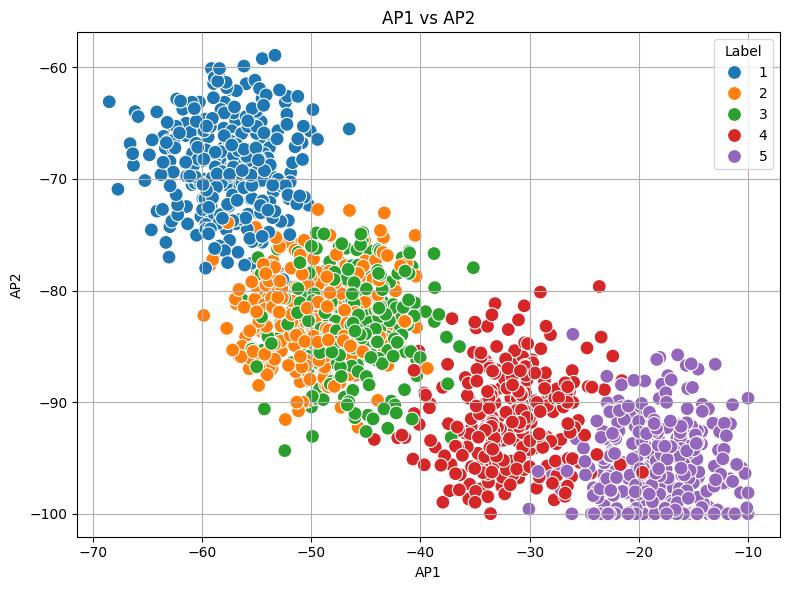

In [34]:
# AP1 vs AP2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='AP1', y='AP2', hue='Label', palette='tab10', s=100)
plt.title('AP1 vs AP2')
plt.xlabel('AP1')
plt.ylabel('AP2')
plt.legend(title='Label')
plt.grid(True)
plt.tight_layout()
plt.show()

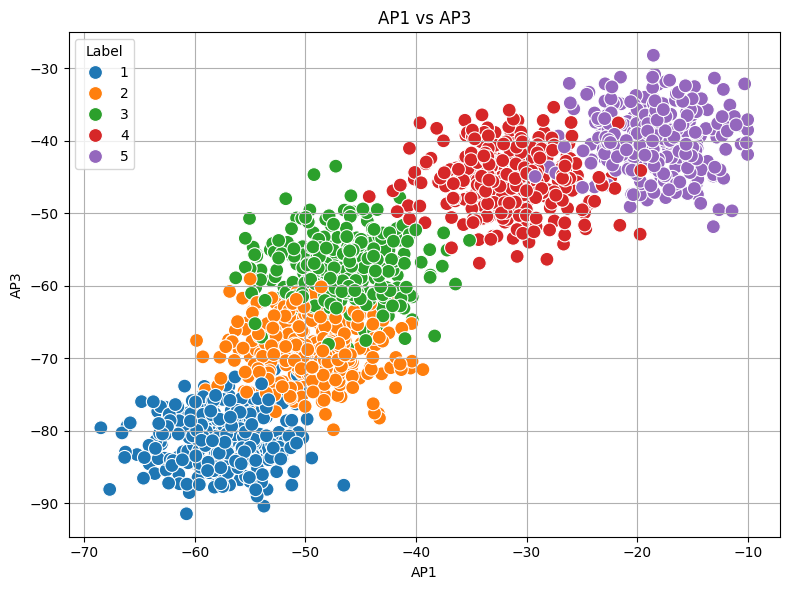

In [35]:
# AP1 vs AP2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='AP1', y='AP3', hue='Label', palette='tab10', s=100)
plt.title('AP1 vs AP3')
plt.xlabel('AP1')
plt.ylabel('AP3')
plt.legend(title='Label')
plt.grid(True)
plt.tight_layout()
plt.show()

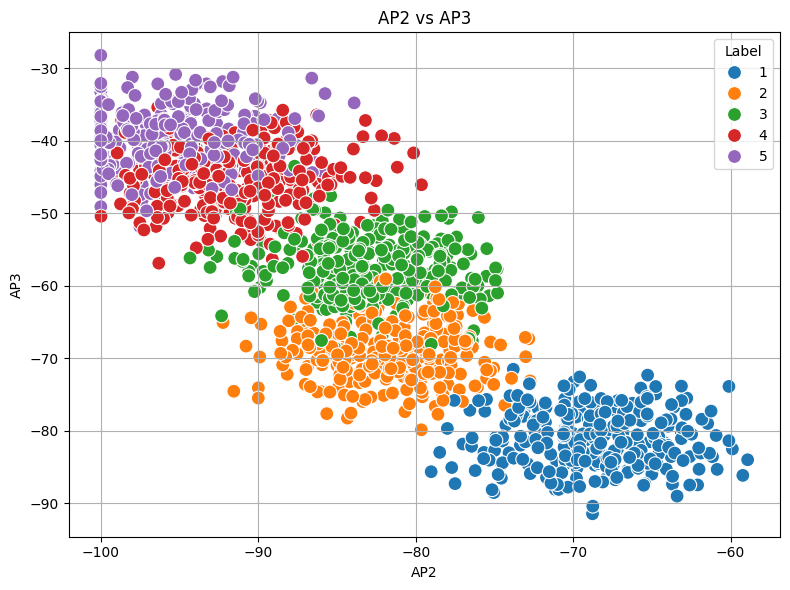

In [36]:
# AP1 vs AP2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='AP2', y='AP3', hue='Label', palette='tab10', s=100)
plt.title('AP2 vs AP3')
plt.xlabel('AP2')
plt.ylabel('AP3')
plt.legend(title='Label')
plt.grid(True)
plt.tight_layout()
plt.show()

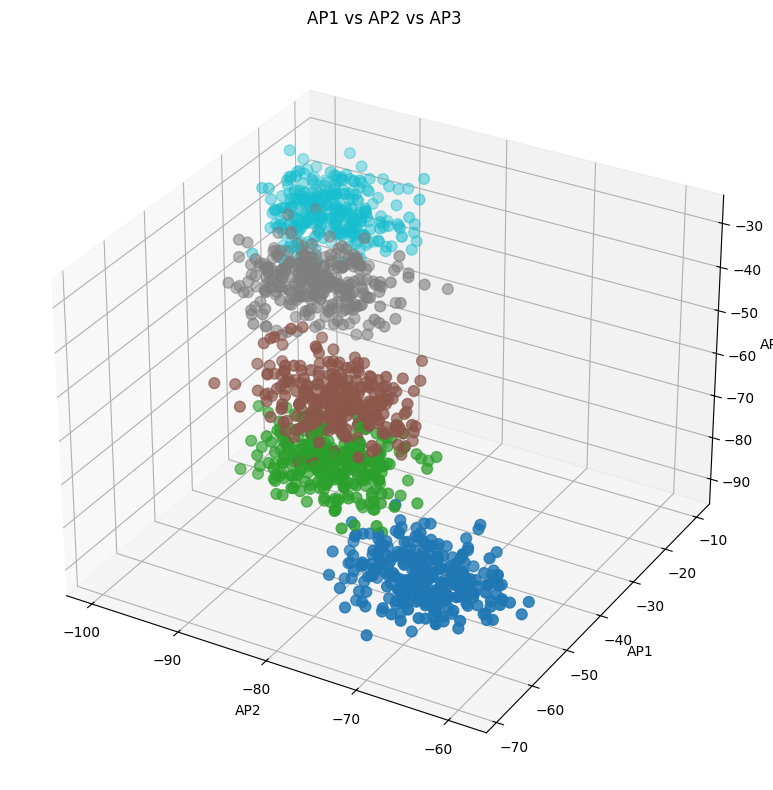

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['AP2'], data['AP1'], data['AP3'], c=data['Label'], cmap='tab10', s=60)

ax.set_title('AP1 vs AP2 vs AP3')
ax.set_xlabel('AP2')
ax.set_ylabel('AP1')
ax.set_zlabel('AP3')

plt.tight_layout()
plt.show()

Part 2: K-means Algorithm implementation

In [152]:
# esto es de chatgpt, tengo que revisarlo
X = data[['AP1', 'AP2', 'AP3']].values

k = 5
T = 100
n_samples, n_features = X.shape

# Random initialization of centroids within the range of the data
centroids = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(k, n_features))

# To store the cluster assignments
labels = np.zeros(n_samples)
prev_labels = np.ones(n_samples)

for iteration in range(T):
    for i, point in enumerate(X):
        distances = np.linalg.norm(point - centroids, axis=1)
        labels[i] = np.argmin(distances)

    if np.array_equal(labels, prev_labels):
        print(f"Converged after {iteration} iterations.")
        break


    # Step 2: Update centroids as the mean of assigned points
    for j in range(k):
        points_in_cluster = X[labels == j]
        if len(points_in_cluster) > 0:
            centroids[j] = points_in_cluster.mean(axis=0)

else:
    print("Reached maximum iterations without full convergence.")

labels += 1

centroids, labels[:10]  # Show final centroids and the first 10 cluster labels

Reached maximum iterations without full convergence.


(array([[-23.00017975, -91.88609367, -41.92128608],
        [-44.58270588, -86.64364706, -53.28513369],
        [-48.5497907 , -78.57775787, -70.46536799]]),
 array([3., 2., 1., 3., 3., 3., 3., 3., 2., 3.]))

<ipython-input-145-7eade2cc0905>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



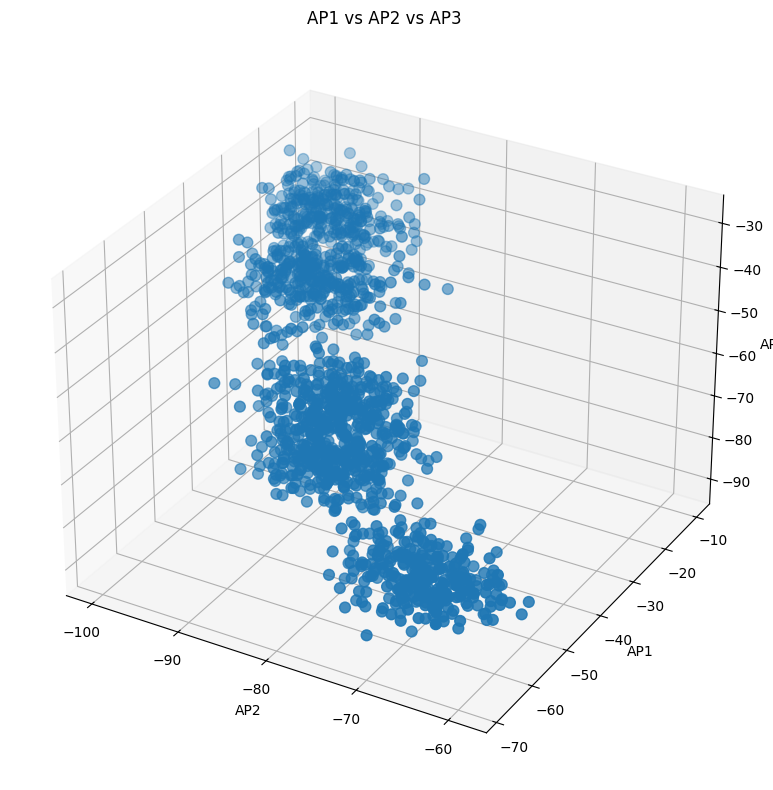

In [145]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['AP2'], data['AP1'], data['AP3'], cmap='tab10', s=60)

ax.set_title('AP1 vs AP2 vs AP3')
ax.set_xlabel('AP2')
ax.set_ylabel('AP1')
ax.set_zlabel('AP3')

plt.tight_layout()
plt.show()

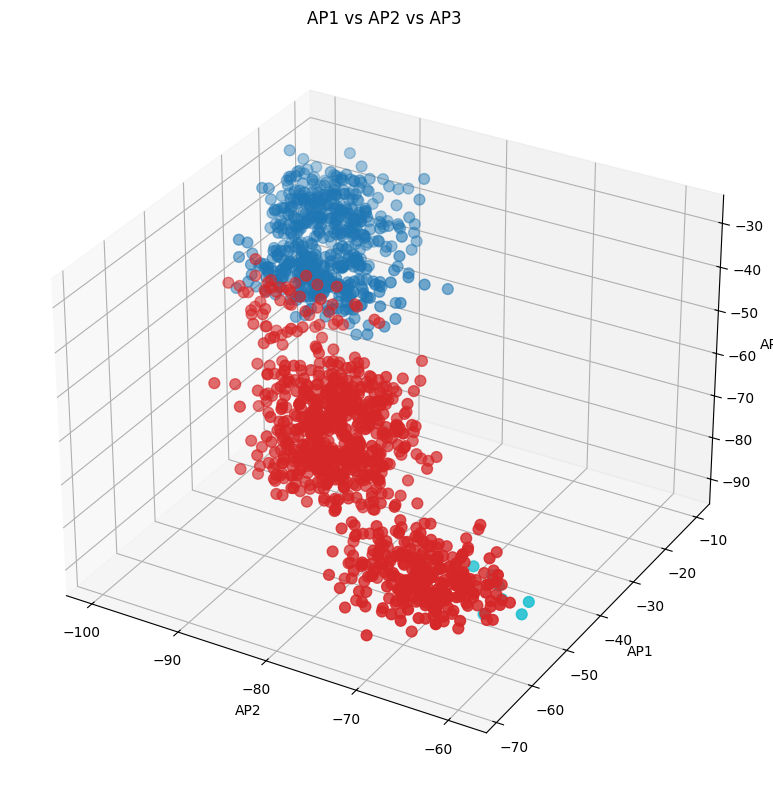

In [151]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['AP2'], data['AP1'], data['AP3'], c=labels, cmap='tab10', s=60)

ax.set_title('AP1 vs AP2 vs AP3')
ax.set_xlabel('AP2')
ax.set_ylabel('AP1')
ax.set_zlabel('AP3')

plt.tight_layout()
plt.show()

In [147]:
labels_df = pd.DataFrame(labels)
labels_df.columns = ["Label"]

print(len(labels_df[labels_df["Label"] == 1]))
print(len(data[data['Label'] == 3]))

331
300


In [148]:
import plotly.graph_objects as go
import pandas as pd

# Crear DataFrame con tus datos
df = data

# Crear gráfico 3D interactivo
fig = go.Figure(data=[go.Scatter3d(
    x=df['AP1'],
    y=df['AP2'],
    z=df['AP3'],
    mode='markers',
    marker=dict(
        size=6,
        color=labels,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Label')
    )
)])

fig.update_layout(
    title='AP1 vs AP2 vs AP3 (interactivo)',
    scene=dict(
        xaxis_title='AP1',
        yaxis_title='AP2',
        zaxis_title='AP3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()
